# First steps with data analysis in Python

A workshop at [Aspects of Neuroscience](http://neuroaspects.org/) 2016, by [Piotr Migdał](http://p.migdal.pl/).

# 3. Data analysis in Python

## Plots

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

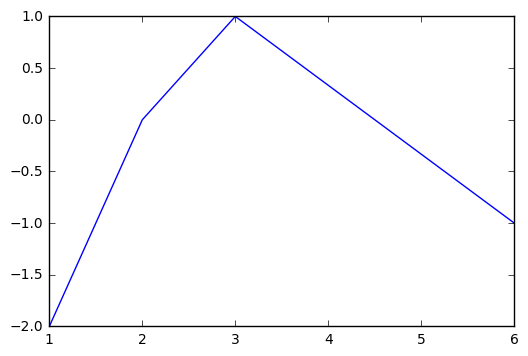

In [2]:
plt.plot([1, 2, 3, 6], [-2, 0, 1, -1])

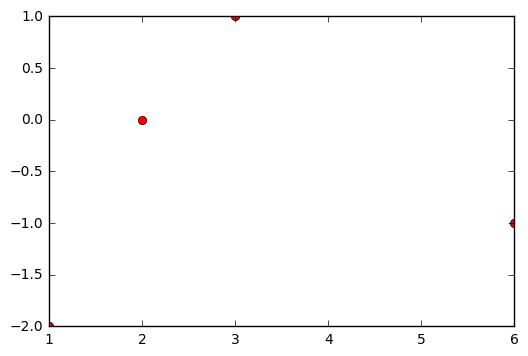

In [3]:
plt.plot([1, 2, 3, 6], [-2, 0, 1, -1], 'ro')

In [4]:
import seaborn as sns
sns.set_style('whitegrid')

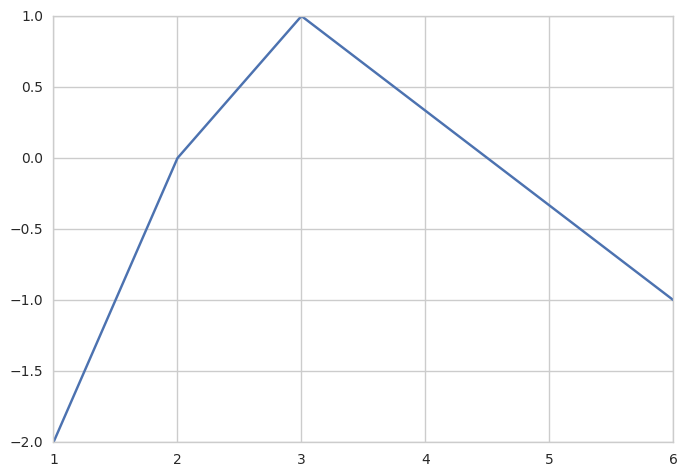

In [5]:
plt.plot([1, 2, 3, 6], [-2, 0, 1, -1])

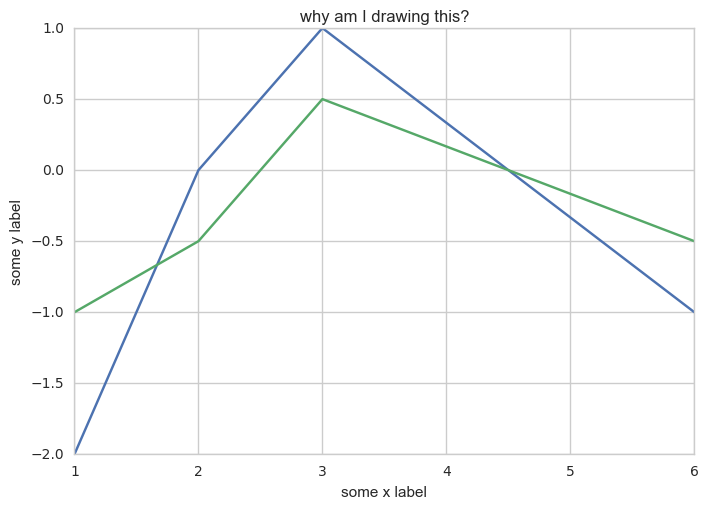

In [6]:
plt.plot([1, 2, 3, 6], [-2, 0, 1, -1])
plt.plot([1, 2, 3, 6], [-1, -0.5, 0.5, -0.5])
plt.xlabel("some x label")
plt.ylabel("some y label")
plt.title("why am I drawing this?")

## Working with tabular data

In [7]:
# key library for working with tabular data
import pandas as pd

A 2 year record of bike renting in Washington DC.
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

The official description of columns goes as follows:

- `instant`: record index
- `dteday`: date
- `season`: season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr`: year (0: 2011, 1:2012)
- `mnth`: month ( 1 to 12)
- `hr`: hour (0 to 23)
- `holiday`: weather day is holiday or not (extracted from [Web Link])
- `weekday`: day of the week
- `workingday`: if day is neither weekend nor holiday is 1, otherwise is 0.
- `weathersit`: 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp`: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- `atemp`: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

In [ ]:
pd.re

In [8]:
days = pd.read_csv("bike_sharing_day.csv", parse_dates=["dteday"], index_col="dteday")

In [9]:
# fist few entires
days.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
# number of rows and columns
days.shape

(731, 15)

In [11]:
days.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 15 columns):
instant       731 non-null int64
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11)
memory usage: 91.4 KB


In [12]:
# selecting a column
temp = days["temp"]
# or: 
temp = days.temp

In [13]:
temp.head()

dteday
2011-01-01    0.344167
2011-01-02    0.363478
2011-01-03    0.196364
2011-01-04    0.200000
2011-01-05    0.226957
Name: temp, dtype: float64

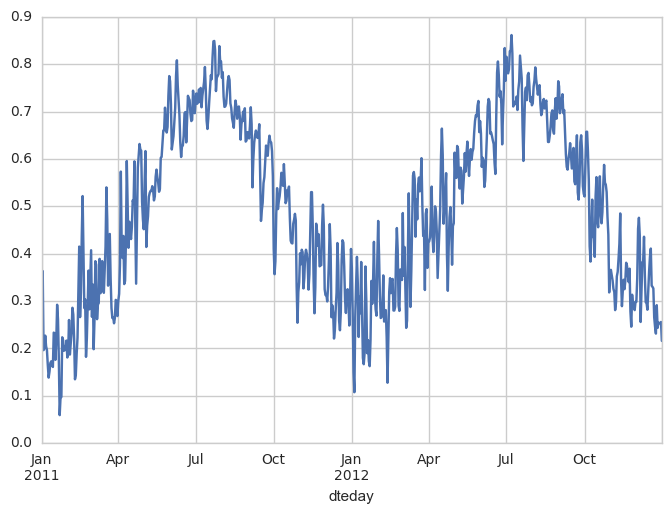

In [14]:
# a simple plot
temp.plot()

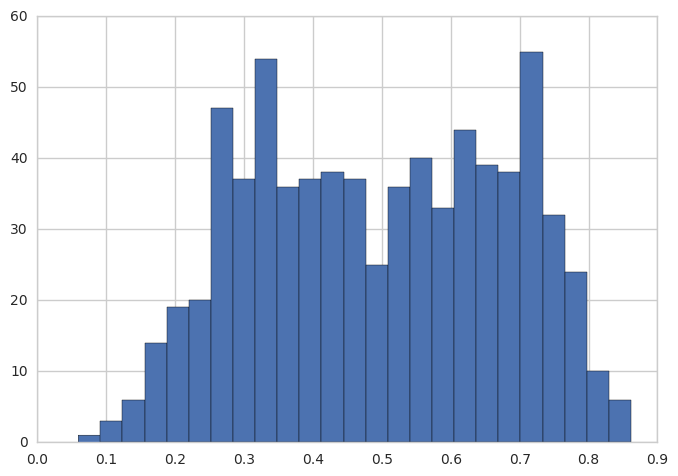

In [15]:
# a histogram of values
temp.hist(bins=25)

In [16]:
# selecting columns
weather = days[["temp", "hum", "windspeed"]]
weather.head()

,temp,hum,windspeed
dteday,,,
2011-01-01,0.344167,0.805833,0.160446
2011-01-02,0.363478,0.696087,0.248539
2011-01-03,0.196364,0.437273,0.248309
2011-01-04,0.200000,0.590435,0.160296
2011-01-05,0.226957,0.436957,0.186900


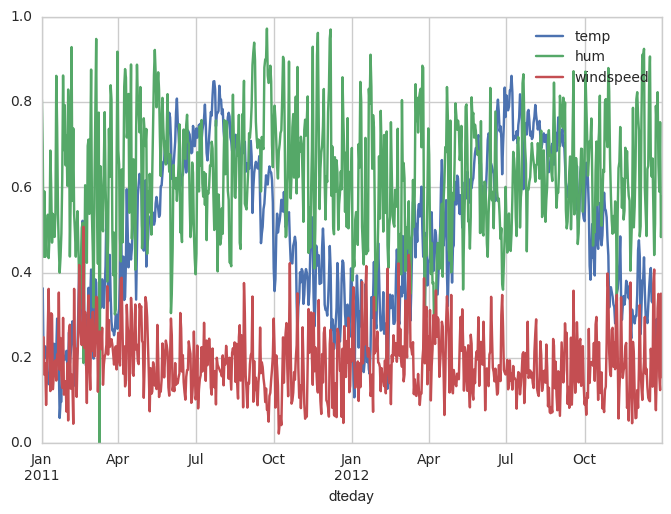

In [17]:
weather.plot()

In [18]:
weather.mean()

temp         0.495385
hum          0.627894
windspeed    0.190486
dtype: float64

In [19]:
weather.describe()

,temp,hum,windspeed
count,731.000000,731.000000,731.000000
mean,0.495385,0.627894,0.190486
std,0.183051,0.142429,0.077498
min,0.059130,0.000000,0.022392
25%,0.337083,0.520000,0.134950
50%,0.498333,0.626667,0.180975
75%,0.655417,0.730209,0.233214
max,0.861667,0.972500,0.507463


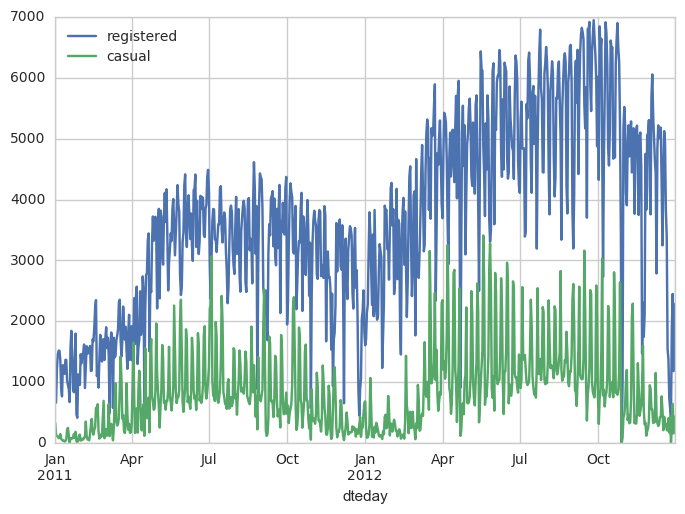

In [20]:
days[["registered", "casual"]].plot()

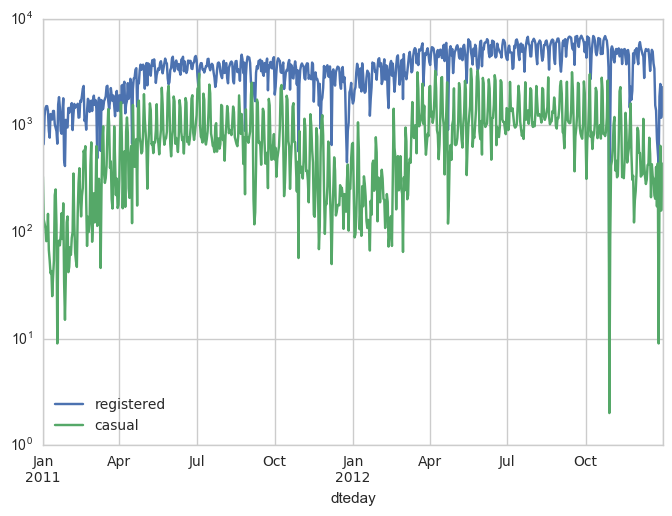

In [22]:
days[["registered", "casual"]].plot(logy=True)

In [23]:
days.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


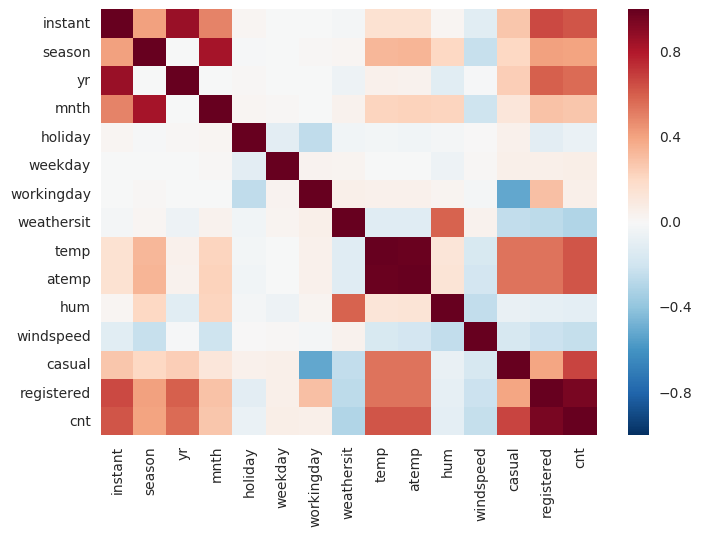

In [24]:
sns.heatmap(days.corr())

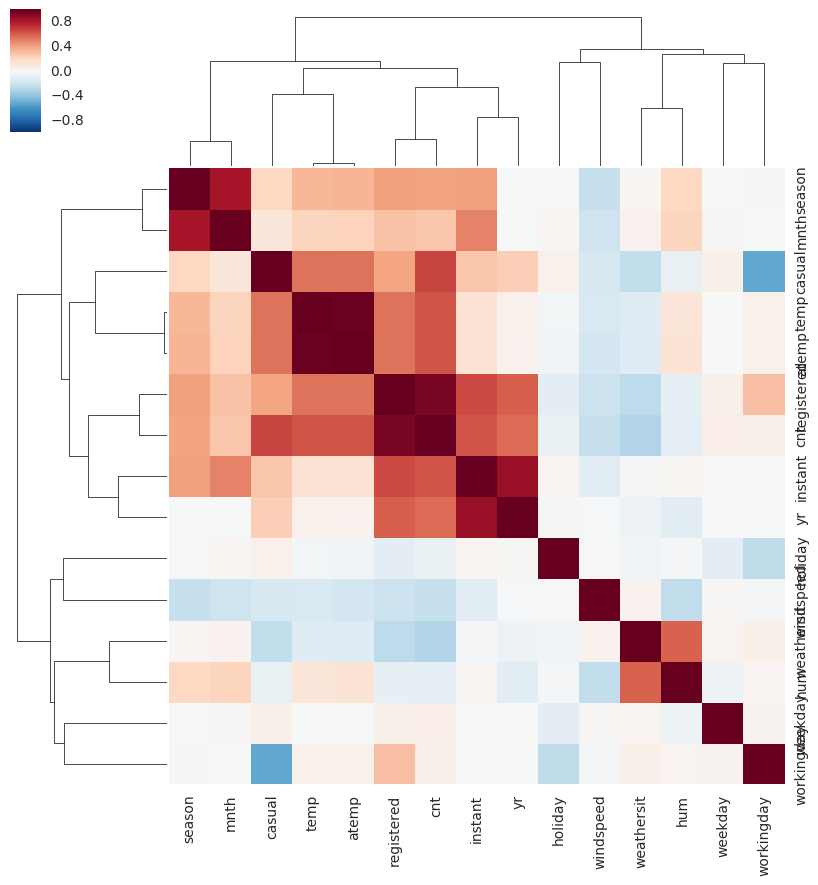

In [25]:
sns.clustermap(days.corr())

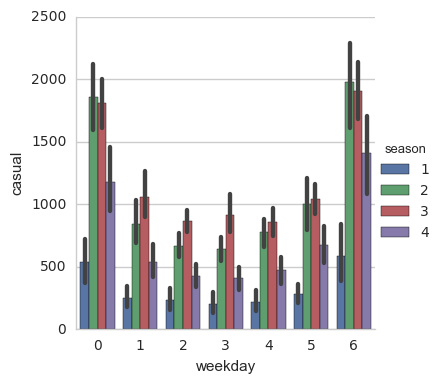

In [26]:
sns.factorplot(data=days, x="weekday", y="casual", hue="season", kind="bar")

# Links

* General
    * [A modern guide to getting started with Data Science and Python](http://twiecki.github.io/blog/2014/11/18/python-for-data-science/)
    * [Data science intro for math/phys background](http://p.migdal.pl/2016/03/15/data-science-intro-for-math-phys-background.html) by me    
* Plots
    * [Overview of Python Visualization Tools](http://pbpython.com/visualization-tools-1.html)
    * [Pandas Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
    * [Matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)
    * [Seaborn: statistical data visualization](https://stanford.edu/~mwaskom/software/seaborn/)
    * [Why xkcd-style graphs are important](https://www.chrisstucchio.com/blog/2014/why_xkcd_style_graphs_are_important.html)
* Other
    * [Web Scraping - It’s Your Civic Duty](http://pbpython.com/web-scraping-mn-budget.html)
    * [Scipy Lecture Notes - One document to learn numerics, science, and data with Python](http://www.scipy-lectures.org/)